<a href="https://colab.research.google.com/github/RitulMohan/tf.Keras/blob/main/denoising_autoencoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf 

In [25]:
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
from tensorflow.keras.datasets import mnist

In [3]:
(X_train, Y_train), (X_test, Y_test)=mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


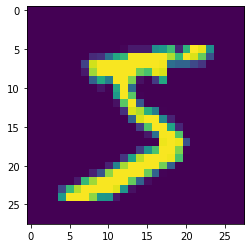

In [6]:
plt.imshow(X_train[0])

In [7]:
X_train = X_train/255
X_test = X_test/255

## adding noise to the dataset using a **Gaussian Noise** **Layer**

In [8]:
from tensorflow.keras.layers import GaussianNoise

In [9]:
sample = GaussianNoise(0.2)

In [10]:
noisey = sample(X_test[0:2],training=True)

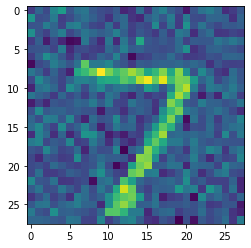

In [11]:
plt.imshow(noisey[0])

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Reshape

#creating the model

In [14]:
#generate noise
tf.random.set_seed(101)
np.random.seed(101)

Encoder

In [17]:
encoder = Sequential([
     Flatten(input_shape=[28,28]),
     GaussianNoise(0.2),
     Dense(400,activation='relu'),
     Dense(200,activation ='relu'),
     Dense(100, activation='relu'),
     Dense(50, activation='relu'),
     Dense(25,activation ='relu')
])

Decoder

In [19]:
decoder = Sequential([
   Dense(50, activation ='relu'), 
   Dense(100, activation ='relu'),
   Dense(200, activation='relu'), 
   Dense(400, activation ='relu'), 
   Dense(28*28,activation='sigmoid'),
   Reshape([28,28])
])

Putting the model together 

In [20]:
noise_remover = Sequential([encoder, decoder])

In [21]:
noise_remover.compile(loss="binary_crossentropy", optimizer='adam')

In [22]:
noise_remover.fit(X_train, X_train, epochs=8,validation_data=[X_test, X_test])

Epoch 1/8
1875/1875 [==============================] - 20s 10ms/step - loss: 0.1781 - val_loss: 0.1367
Epoch 2/8
1875/1875 [==============================] - 20s 11ms/step - loss: 0.1323 - val_loss: 0.1231
Epoch 3/8
1875/1875 [==============================] - 20s 11ms/step - loss: 0.1223 - val_loss: 0.1161
Epoch 4/8
1875/1875 [==============================] - 20s 11ms/step - loss: 0.1179 - val_loss: 0.1132
Epoch 5/8
1875/1875 [==============================] - 20s 10ms/step - loss: 0.1150 - val_loss: 0.1109
Epoch 6/8
1875/1875 [==============================] - 20s 10ms/step - loss: 0.1121 - val_loss: 0.1081
Epoch 7/8
1875/1875 [==============================] - 20s 11ms/step - loss: 0.1097 - val_loss: 0.1056
Epoch 8/8
1875/1875 [==============================] - 19s 10ms/step - loss: 0.1080 - val_loss: 0.1045


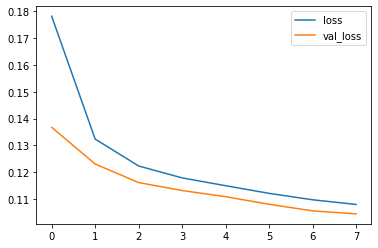

In [27]:
losses= pd.DataFrame(noise_remover.history.history)
losses.plot()

results

In [29]:
ten_noisey_images = sample(X_test[0:10],training=True)
denoised = noise_remover(ten_noisey_images[0:10])

The Original


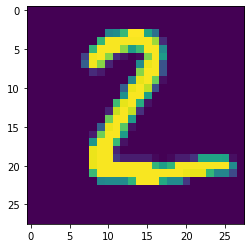

The Noisey Version


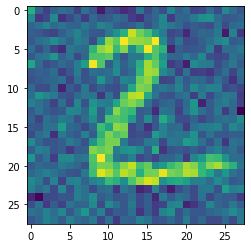

After going through denoiser


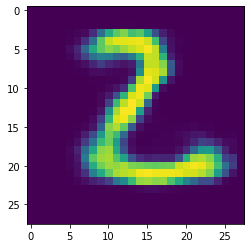

In [30]:
n = 1
print("The Original")
plt.imshow(X_test[n])
plt.show()
print("The Noisey Version")
plt.imshow(ten_noisey_images[n])
plt.show()
print("After going through denoiser")
plt.imshow(denoised[n])
plt.show()